# MNIST

여기서는 손글씨 숫자 dataset인 MNIST를 사용해서 classification을 해본다.

사이킷런에서는 MNIST와 같은 유명한 데이터셋을 가져올 수 있는 helper function을 제공한다.

In [1]:
import os

dataset_root = os.path.join(os.getcwd(), 'datasets')
if not os.path.isdir(dataset_root):
    os.mkdir(dataset_root)

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home=dataset_root)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


사이킷런에서 로드된 datset은 다음의 키값을 가지는 dictionary 구조를 가진다.
- 데이터셋을 나타내는 `DESCR` 키
- 각 row는 instance, 각 column은 feature로 이루어진 array를 가지는 `data` 키
- label을 가지는 `target` 키

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


총 70000장의 이미지가 있고, 각 이미지는 784개의 feature를 가진다. 이는 이미지가 28x28의 크기를 가지기 때문이며, 각 feature는 한 픽셀의 intensity를 나타낸다.

한 instance vector를 28x28 array로 변환한 후, display해보자.

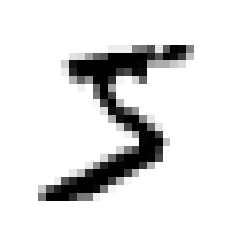

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

이는 5처럼 보인다. 해당 label과 datatype을 출력해보자.

In [5]:
print(y[0], type(y[0]))

5 <class 'str'>


우리가 생각한 것처럼 5가 맞았지만, datatype이 string이므로 이를 integer로 바꿔주어야 한다.

In [6]:
import numpy as np

y = y.astype(np.uint8)

dataset을 자세히 살펴보기 전에 test set을 분리하자.

MNIST dataset은 첫 60000개는 training, 나머지 10000개는 test로 이미 분리되어 있으므로 다음과 같이 분리하면 된다.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


또한, MNIST의 training set은 이미 shuffle되어 있다. 이는 다음과 같은 장점이 있다.

- cross-validation의 모든 fold별로 고르게 label을 가지게 해준다. 
- 몇가지 학습 알고리즘은 training data의 instance들의 순서에 민감해서 좋지 못한 성능을 낼 때가 있는데 shuffle은 이를 방지해준다.